In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/white wine quality/winequality-white.csv',sep = ";")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Creating data for training,testing and validation 
X = dataset.drop('quality',axis = 1)
y = dataset['quality']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 0)
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.05,random_state = 0)

In [5]:
# Data Scaling 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_new = scale.fit_transform(x_train)

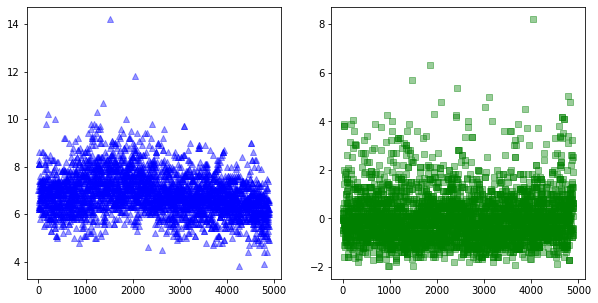

In [6]:
# In the below plots mean is 0 and std is 1
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (10,5))
ax1.scatter(x_train.index,x_train['fixed acidity'],color='blue',alpha = 0.4,marker='^')
ax2.scatter(x_train.index,x_train_new[:,1],color='green',alpha = 0.4,marker='s')

In [7]:
x_test_new = scale.transform(X_test)
x_val_new =scale.transform(x_val)

In [8]:
def plot_learning_curve(history):
  epoch = 30
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['mae'])
  plt.plot(epoch_range,history.history['val_mae'])
  plt.ylim([0,2])
  plt.xlabel('epochs')
  plt.ylabel('mae')
  plt.title('Model mae')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()
  print('--------------------------------------------')

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.ylim([0,4])
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Model Loss')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

In [9]:
# Small Model
small_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation = 'relu',input_shape = (11,)),
    tf.keras.layers.Dense(1)
])

# Compile
small_model.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])

# Fit 
history_small= small_model.fit(
    x_train_new,y_train,batch_size = 32,epochs = 30,verbose = 1,
    validation_data = (x_val_new,y_val))

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 24.4809 - mae: 4.7836 - val_loss: 16.7902 - val_mae: 3.9023
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 10.9176 - mae: 2.9957 - val_loss: 6.3923 - val_mae: 2.1973
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 4.5361 - mae: 1.7607 - val_loss: 3.0825 - val_mae: 1.4532
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 3.0681 - mae: 1.3998 - val_loss: 2.3304 - val_mae: 1.2614
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 2.6022 - mae: 1.2744 - val_loss: 1.9993 - val_mae: 1.1692
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 2.2927 - mae: 1.1878 - val_loss: 1.7721 - val_mae: 1.1013
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 2.0375 - mae: 1.1171 - val_loss: 1.5709 - val_mae: 1.0411
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss:

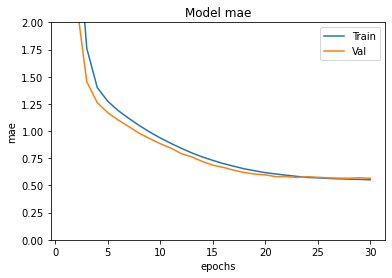

--------------------------------------------


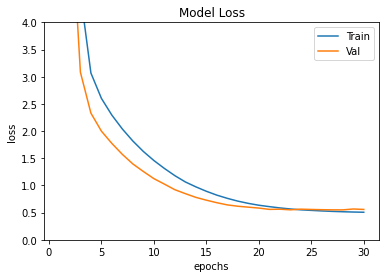

In [10]:
plot_learning_curve(history_small)

In [11]:
small_model.evaluate(X_test,y_test,batch_size = 32,verbose = 1)

23/23 [==============================] - 0s 2ms/step - loss: 765.4313 - mae: 26.1078


[765.4312744140625, 26.10781478881836]

In [12]:
import numpy as np
unseen_data = np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])
     

y_small = small_model.predict(scale.transform(unseen_data))
print ("Wine quality on unseen data (small model): ", y_small[0][0])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 289ms/step
Wine quality on unseen data (small model):  5.1877027


In [13]:
# Medium Model
medium_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation = 'relu',input_shape = (11,)),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(1)
])
medium_model.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])

In [14]:
history_medium = medium_model.fit(x_train_new,y_train,batch_size = 32,verbose = 1 , epochs = 30,
                 validation_data = (x_val_new,y_val))

Epoch 1/30
124/124 [==============================] - 2s 7ms/step - loss: 8.3222 - mae: 2.1691 - val_loss: 1.7975 - val_mae: 1.1103
Epoch 2/30
124/124 [==============================] - 0s 3ms/step - loss: 1.7049 - mae: 0.9930 - val_loss: 1.3159 - val_mae: 0.9460
Epoch 3/30
124/124 [==============================] - 0s 3ms/step - loss: 1.0259 - mae: 0.7804 - val_loss: 0.6430 - val_mae: 0.6267
Epoch 4/30
124/124 [==============================] - 1s 6ms/step - loss: 0.6976 - mae: 0.6440 - val_loss: 0.5429 - val_mae: 0.5723
Epoch 5/30
124/124 [==============================] - 1s 4ms/step - loss: 0.5770 - mae: 0.5920 - val_loss: 0.5739 - val_mae: 0.5753
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5216 - mae: 0.5594 - val_loss: 0.5346 - val_mae: 0.5595
Epoch 7/30
124/124 [==============================] - 1s 6ms/step - loss: 0.5075 - mae: 0.5547 - val_loss: 0.5067 - val_mae: 0.5471
Epoch 8/30
124/124 [==============================] - 1s 6ms/step - loss: 0.

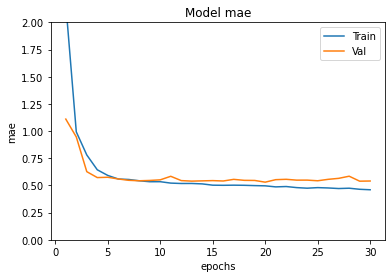

--------------------------------------------


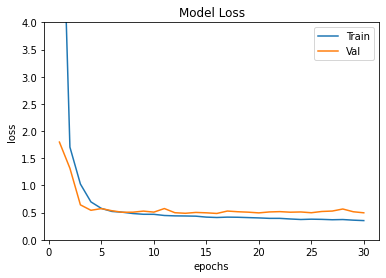

In [15]:
plot_learning_curve(history_medium)

In [16]:
medium_model.evaluate(x_test_new,y_test,verbose = 1,batch_size = 32)

23/23 [==============================] - 0s 2ms/step - loss: 0.5925 - mae: 0.5739


[0.5924635529518127, 0.5738822817802429]

In [17]:
y_medium = medium_model.predict(scale.transform(unseen_data))
y_medium[0][0];

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 170ms/step


In [18]:
# Large Model
large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = 'relu',input_shape = (11,)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1)
])
large_model.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])

In [19]:
history_large = large_model.fit(x_train_new,y_train,batch_size = 32,verbose = 1 , epochs = 30,
                 validation_data = (x_val_new,y_val))

Epoch 1/30
124/124 [==============================] - 5s 13ms/step - loss: 4.5543 - mae: 1.5369 - val_loss: 1.2817 - val_mae: 0.9171
Epoch 2/30
124/124 [==============================] - 1s 7ms/step - loss: 1.1109 - mae: 0.8004 - val_loss: 0.5774 - val_mae: 0.5811
Epoch 3/30
124/124 [==============================] - 1s 4ms/step - loss: 0.6127 - mae: 0.6024 - val_loss: 0.5279 - val_mae: 0.5479
Epoch 4/30
124/124 [==============================] - 1s 6ms/step - loss: 0.5438 - mae: 0.5733 - val_loss: 0.5402 - val_mae: 0.5559
Epoch 5/30
124/124 [==============================] - 1s 6ms/step - loss: 0.5141 - mae: 0.5569 - val_loss: 0.5256 - val_mae: 0.5541
Epoch 6/30
124/124 [==============================] - 1s 5ms/step - loss: 0.4827 - mae: 0.5392 - val_loss: 0.5382 - val_mae: 0.5652
Epoch 7/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4585 - mae: 0.5252 - val_loss: 0.5413 - val_mae: 0.5590
Epoch 8/30
124/124 [==============================] - 0s 3ms/step - loss: 0

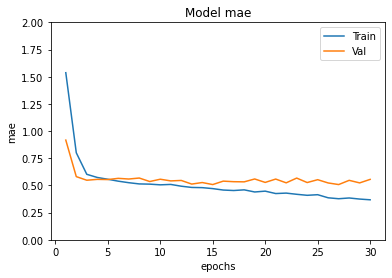

--------------------------------------------


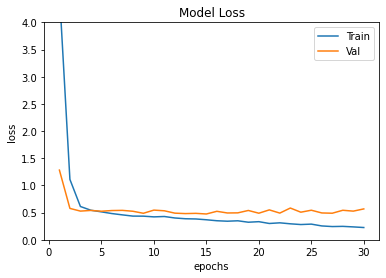

In [20]:
plot_learning_curve(history_large)

In [23]:
large_model.evaluate(x_test_new,y_test,verbose = 1,batch_size = 32)

23/23 [==============================] - 0s 2ms/step - loss: 0.5893 - mae: 0.5813


[0.5893039107322693, 0.5813150405883789]

In [22]:
y_large = large_model.predict(scale.transform(unseen_data))
y_large[0][0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step


5.592221

Epoch 1/30
124/124 [==============================] - 3s 5ms/step - loss: 5.6065 - mae: 1.7832 - val_loss: 2.8808 - val_mae: 1.4719
Epoch 2/30
124/124 [==============================] - 1s 5ms/step - loss: 1.9512 - mae: 1.0832 - val_loss: 1.7767 - val_mae: 1.1437
Epoch 3/30
124/124 [==============================] - 1s 5ms/step - loss: 1.2513 - mae: 0.8743 - val_loss: 1.4118 - val_mae: 1.0156
Epoch 4/30
124/124 [==============================] - 1s 6ms/step - loss: 0.9352 - mae: 0.7495 - val_loss: 1.1432 - val_mae: 0.8707
Epoch 5/30
124/124 [==============================] - 1s 7ms/step - loss: 0.7606 - mae: 0.6696 - val_loss: 0.8208 - val_mae: 0.7037
Epoch 6/30
124/124 [==============================] - 1s 6ms/step - loss: 0.7221 - mae: 0.6595 - val_loss: 0.6766 - val_mae: 0.6293
Epoch 7/30
124/124 [==============================] - 1s 5ms/step - loss: 0.6555 - mae: 0.6372 - val_loss: 0.5756 - val_mae: 0.5800
Epoch 8/30
124/124 [==============================] - 1s 5ms/step - loss: 0.

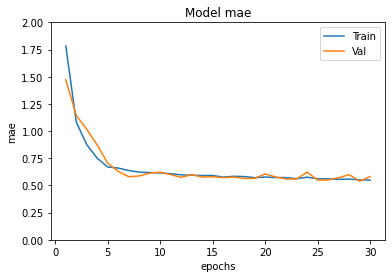

--------------------------------------------


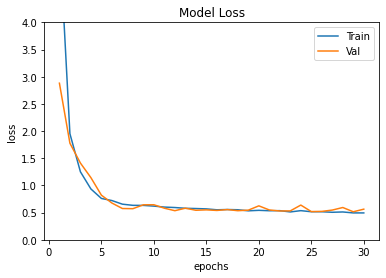

In [24]:
# Reduce Overfitting in case of Large Model
large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = 'relu',input_shape = (11,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1)
])
large_model.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])
history_large_new = large_model.fit(x_train_new,y_train,batch_size = 32,verbose = 1 , epochs = 30,
                 validation_data = (x_val_new,y_val))
plot_learning_curve(history_large_new)

In [25]:
large_model.evaluate(x_test_new,y_test,verbose = 1,batch_size = 32)

23/23 [==============================] - 0s 8ms/step - loss: 0.5857 - mae: 0.5946


[0.5856538414955139, 0.5946270227432251]